## <div align="center"> TUGAS LAB IF540 MACHINE LEARNING </div>
### <div align="center"> WEEK 13 : MODEL SELECTION
 </div>

#### <div align="center"> Semester Genap 2022/2023 </div>

In [1]:
# Run this code when you restart the machine
# Fill in with YOUR name and NIM
import datetime
import uuid

myName = "Christopher Darren"
myNIM = "00000054804"

In [2]:
myDate = datetime.datetime.now()
myDevice = str(uuid.uuid1())

print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Start: \t\t{}".format(myDate))
print("Device ID: \t{}".format(myDevice))

Name: 		Christopher Darren
NIM: 		00000054804
Start: 		2023-05-25 10:17:47.773965
Device ID: 	b9405885-faaa-11ed-9ac5-f02f74a116e8


### Hasil kerja

#### 1. Import libraries

In [2]:
import pandas as pd
import os
import mglearn
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Darren\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


#### 2. To evaluate our supervised models, so far we have split our dataset into a training set and a test set using the train_test_split function, built a model on the training set by calling the fit method, and evaluated it on the test set using the score method, which for classification computes the fraction of correctly classified samples.

In [3]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# create a synthetic dataset
X, y = make_blobs(random_state=0)
# split data and labels into a training and a test set

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# instantiate a model and fit it to the training set

logreg = LogisticRegression().fit(X_train, y_train)
# evaluate the model on the test set
print("Test set score: {:.2f}".format(logreg.score(X_test, y_test)))

Test set score: 0.88


### Cross-Validation
#### 3. The most commonly used version of cross-validation is k-fold cross-validation, where k is a user- specified number, usually 5 or 10.

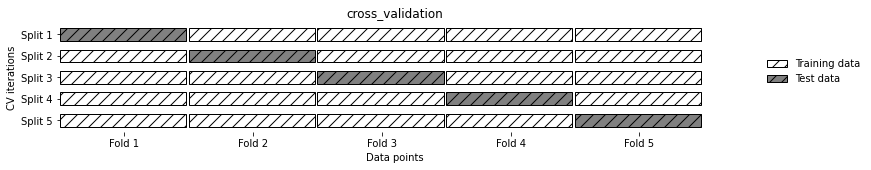

In [4]:
mglearn.plots.plot_cross_validation()

#### 4. Cross-validation is implemented in scikit-learn using the cross_val_score function from the model_selection module. The parameters of the cross_val_score function are the model we want to evaluate, the training data, and the ground-truth labels.

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
iris = load_iris()
logreg = LogisticRegression()
scores = cross_val_score(logreg, iris.data, iris.target)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]


C:\Users\Darren\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### 5. By default, cross_val_score performs three-fold cross-validation, returning three accuracy values. We can change the number of folds used by changing the cv parameter.

In [6]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]


C:\Users\Darren\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### A common way to summarize the cross-validation accuracy is to compute the mean.

In [7]:
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.97


### Stratified k-Fold Cross-Validation and Other Strategies

In [8]:
from sklearn.datasets import load_iris
iris = load_iris()
print("Iris labels:\n{}".format(iris.target))

Iris labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


#### 6. As the simple k-fold strategy fails here, scikit-learn does not use it for classification, but rather uses stratified k-fold cross-validation. In stratified cross-validation, we split the data such that the proportions between classes are the same in each fold as they are in the whole dataset.

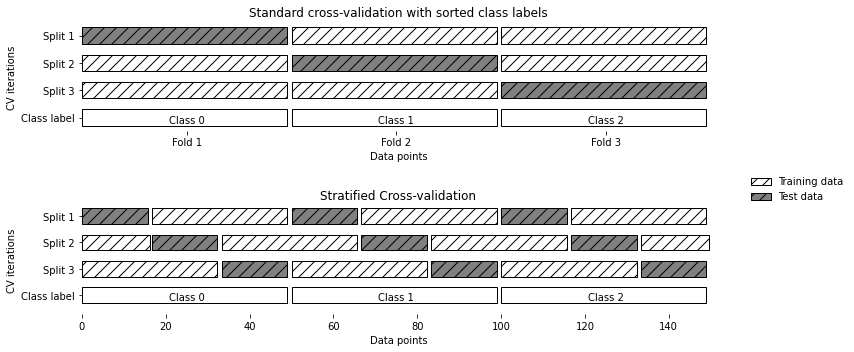

In [9]:
mglearn.plots.plot_stratified_cross_validation()

### More Control Over Cross-Validation
#### 7. Scikit-learn allows for much finer control over what happens during the splitting of the data by providing a crossvalidation splitter as the cv parameter. To do this, we first have to import the KFold splitter class from the model_selection module and instantiate it with the number of folds we want to use.

In [10]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

In [11]:
print("Cross-validation scores:\n{}".format(
    cross_val_score(logreg, iris.data, iris.target, cv =kfold)))

Cross-validation scores:
[1.         1.         0.86666667 0.93333333 0.83333333]


C:\Users\Darren\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Darren\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

In [12]:
kfold = KFold(n_splits=3)
print("Cross-validation scores:\n{}".format(
    cross_val_score(logreg, iris.data, iris.target, cv=kfold)
))

Cross-validation scores:
[0. 0. 0.]


In [13]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("Cross-validation scores:\n{}".format(
    cross_val_score(logreg, iris.data, iris.target, cv=kfold)
))

Cross-validation scores:
[0.98 0.96 0.96]


C:\Users\Darren\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Darren\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

### Leave-one-out Cross-Validation
#### 8. Another frequently used cross-validation method is leave-one-out. You can think of leave-one-out cross-validation as k-fold cross-validation where each fold is a single sample. For each split, you pick a single data point to be the test set.

In [14]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("Number of cv iterations:", len(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))

C:\Users\Darren\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Darren\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

Number of cv iterations: 150
Mean accuracy: 0.97


C:\Users\Darren\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Darren\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

### Shuffle-split Cross-Validation

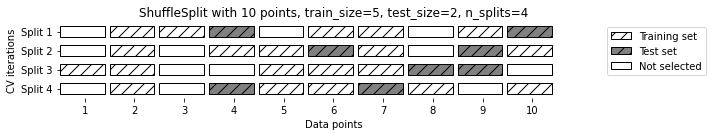

In [15]:
mglearn.plots.plot_shuffle_split()

#### 9. The following code splits the dataset into 50% training set and 50% test set for 10 iterations.

In [16]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[0.97333333 0.94666667 0.97333333 0.97333333 0.97333333 0.97333333
 0.89333333 0.93333333 0.98666667 0.96      ]


C:\Users\Darren\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Darren\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

### Cross-Validation with Groups
#### 10. The following is an example of using a synthetic dataset with a grouping given by the groups

In [17]:
from sklearn.model_selection import GroupKFold
# create synthetic dataset
x, y = make_blobs(n_samples=12, random_state=0)
# assume the first three samples belong to the same group
# then the next four, etc.
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, x, y, groups=groups, cv=GroupKFold(n_splits=3))
print("Cross-validation scores: \n{}".format(scores))

Cross-validation scores: 
[0.75       0.6        0.66666667]


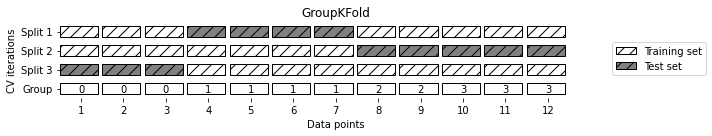

In [18]:
mglearn.plots.plot_group_kfold()

### Grid Search

In [19]:
# naive grid search implementation
from sklearn.svm import SVC
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
print("Size of training set: {}     size of test set: {}".format(
    x_train.shape[0], x_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(x_train, y_train)
        # evaluate the SVC on the test set
        score = svm.score(x_test, y_test)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C':C, 'gamma':gamma}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Size of training set: 112     size of test set: 38
Best score: 0.97
Best parameters: {'C': 100, 'gamma': 0.001}


### Danger of Overfitting the Parameters and Validation Set

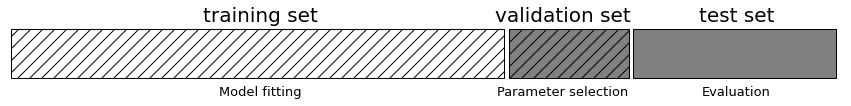

In [20]:
mglearn.plots.plot_threefold_split()

#### 11. This leads to the following implementation:

In [21]:
# split data into train+validation set and test set
x_trainval, x_test, y_trainval, y_test = train_test_split(
    iris.data, iris.target, random_state=0)
# split train+validation set into training and validation sets
x_train, x_valid, y_train, y_valid = train_test_split(
    x_trainval, y_trainval, random_state=1)
print("Size of training set: {}     size of validation set: {}  size of test set:"
      " {}\n".format(x_train.shape[0], x_valid.shape[0], x_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(x_train, y_train)
        # evaluate the SVC on the test set
        score = svm.score(x_valid, y_valid)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C':C, 'gamma':gamma}
# rebuild a model on the combined training and validation set
# and evaluate it on the test set
svm = SVC(**best_parameters)
svm.fit(x_trainval, y_trainval)
test_score = svm.score(x_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Size of training set: 84     size of validation set: 28  size of test set: 38

Best score on validation set: 0.96
Best parameters:  {'C': 10, 'gamma': 0.001}
Test set score with best parameters: 0.92


### Grid Search with Cross-Validation

In [22]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        # perform cross-validation
        scores = cross_val_score(svm, x_trainval, y_trainval, cv=5)
        # compute mean cross-validation accuracy
        score = np.mean(scores)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C':C, 'gamma':gamma}
# rebuild a model on the combined training and validation set
svm = SVC(**best_parameters)
svm.fit(x_trainval, y_trainval)

SVC(C=10, gamma=0.1)

#### 12. The following visualization (Figure 5-6) illustrates how the best parameter setting is selected in the preceding code.

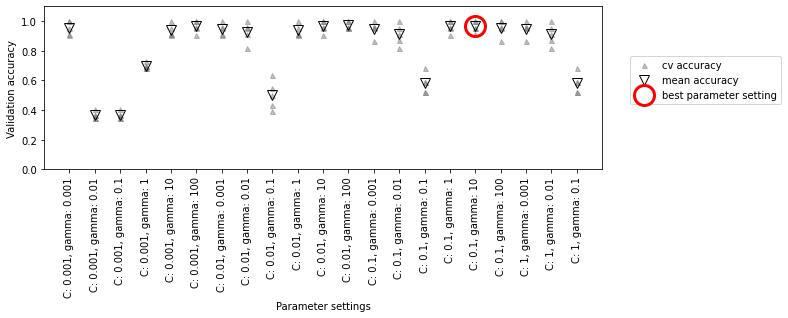

In [23]:
import mglearn
mglearn.plots.plot_cross_val_selection()

#### 13. The overall process of splitting the data, running the grid search, and evaluating the final parameters.

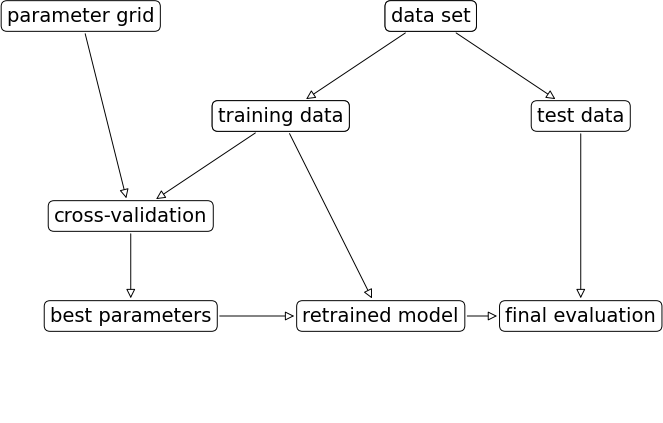

In [24]:
mglearn.plots.plot_grid_search_overview()

#### 14. First Trying the values 0.001, 0.01, 0.1, 1, 10, and 100 for C and gamma translates to the following dictionary.

In [25]:
param_grid = {'C' : [0.001, 0.1, 0.1, 1, 10, 100],
              'gamma':[0.001, 0.1, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.1, 0.1, 1, 10, 100], 'gamma': [0.001, 0.1, 0.1, 1, 10, 100]}


In [26]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=5,
                           return_train_score='True')

In [27]:
x_train, x_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0)

In [28]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.1, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.1, 0.1, 1, 10, 100]},
             return_train_score='True')

In [29]:
print("Test set score: {:.2f}".format(grid_search.score(x_test, y_test)))

Test set score: 0.97


In [30]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'gamma': 0.1}
Best cross-validation score 0.97


In [31]:
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Best estimator:
SVC(C=10, gamma=0.1)


### Analyzing the Result of Cross-Validation

In [32]:
#convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001401,0.000490,0.000801,0.000400,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.347826,0.347826,0.363636,...,0.366403,0.022485,25,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
1,0.001201,0.000400,0.000999,0.000003,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.347826,0.347826,0.363636,...,0.366403,0.022485,25,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
2,0.000800,0.000400,0.000800,0.000400,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.347826,0.347826,0.363636,...,0.366403,0.022485,25,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
3,0.000597,0.000488,0.000601,0.000491,0.001,1,"{'C': 0.001, 'gamma': 1}",0.347826,0.347826,0.363636,...,0.366403,0.022485,25,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
4,0.001200,0.000399,0.000600,0.000490,0.001,10,"{'C': 0.001, 'gamma': 10}",0.347826,0.347826,0.363636,...,0.366403,0.022485,25,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581


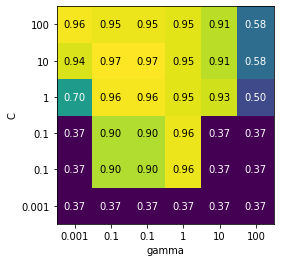

In [33]:
scores = np.array(results.mean_test_score).reshape(6, 6)

# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                    ylabel='C',yticklabels=param_grid['C'], cmap='viridis')

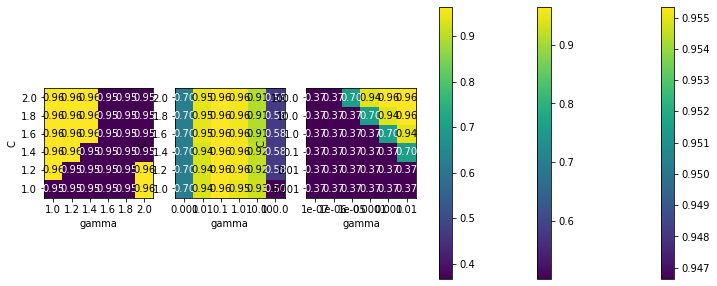

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))

param_grid_linear = {'C': np.linspace(1, 2, 6),
                    'gamma': np.linspace(1, 2, 6)}
param_grid_one_log = {'C': np.linspace(1, 2, 6),
                    'gamma': np.logspace(-3, 2, 6)}
param_grid_range = {'C': np.logspace(-3, 2, 6),
                    'gamma': np.logspace(-7, -2, 6)}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log,
                          param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(x_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)

    #plot the mean cross -validation scores
    scores_image = mglearn.tools.heatmap(
        scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'],
        yticklabels=param_grid['C'], cmap='viridis', ax=ax)

    plt.colorbar(scores_image, ax=axes.tolist())

### Search Over Spaces that are not Grids
#### 15. A possible grid search involving kernel and parameters could look like this.

In [35]:
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 10, 100]},
               {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print("List of grids:\n{}".format(param_grid))

List of grids:
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


#### 16. Now let’s apply this more complex parameter search.

In [36]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score='True')
grid_search.fit(x_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation score: 0.97


#### 17. Let’s look at the cv_results_ again.

In [37]:
results = pd.DataFrame(grid_search.cv_results_)
# we display the transposed so that it better fits on the page:
display(results.T)

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
mean_fit_time,0.001201,0.0008,0.0008,0.000806,0.001006,0.0008,0.0008,0.000601,0.001001,0.000999,...,0.000601,0.000401,0.000997,0.000997,0.000802,0.000402,0.0004,0.000204,0.0002,0.0002
std_fit_time,0.0004,0.0004,0.0004,0.000403,0.000006,0.0004,0.0004,0.00049,0.000002,0.000001,...,0.000491,0.000491,0.000004,0.000006,0.000401,0.000492,0.00049,0.000408,0.0004,0.0004
mean_score_time,0.001199,0.0006,0.0004,0.000397,0.000799,0.000997,0.0004,0.000599,0.0004,0.000801,...,0.000401,0.0004,0.000203,0.000401,0.0004,0.0002,0.000201,0.0,0.0,0.0008
std_score_time,0.0004,0.00049,0.00049,0.000486,0.000399,0.000006,0.00049,0.000489,0.00049,0.0004,...,0.000491,0.00049,0.000406,0.000491,0.00049,0.0004,0.000403,0.0,0.0,0.0004
param_C,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,0.01,...,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,10,100,0.001,0.01,0.1,10,100,...,0.01,0.1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,...,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 100, 'kernel': 'rbf'}",...,"{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,1.0,1.0,0.869565,0.521739,0.347826,0.869565,1.0,1.0,1.0,0.956522
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,0.913043,0.956522,0.913043,0.521739,0.347826,0.869565,0.913043,0.956522,1.0,0.956522


### Nested Cross-Validation
#### 18. We call cross_val_score with an instance of GridSearchCV as the model.

In [38]:
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5),
                        iris.data, iris.target, cv=5)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

Cross-validation scores: [0.96666667 1.         0.9        0.96666667 1.        ]
Mean cross-validation score: 0.9666666666666668


#### 19. It can be a bit tricky to understand what is happening in the single line given above, and it can be helpful to visualize it as for loops, as done in the following simplified implementation.

In [39]:
def nested_cv(x, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []
    # for each split of the data in the outer cross-validation
    # (split method returns indices)

    for training_samples, test_samples in outer_cv.split(x, y):
        # find best parameter using inner cross-validation
        best_params = {}
        best_score = np.inf
        # iteratre over parameters

        for parameters in parameter_grid:
            # acccumulate score over inner splits
            cv_scores = []
            # iterat over inner cross-validation
            for inner_train, inner_test in inner_cv.split(
                x[training_samples], y[training_samples]):
                # build classifier given parameters and training data
                clf = Classifier(**parameters)
                clf.fit(x[inner_train], y[inner_train])
                # evaluate on inner test set
                score = clf.score(x[inner_train], y[inner_train])
                cv_scores.append(score)
            # computer
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                # if better than so far,remember parameters
                best_score = mean_score
                best_params = parameters
        
        # build classifier on best parameters using outer training set
        clf = Classifier(**parameters)
        clf.fit(x[training_samples], y[training_samples])
        # evaluate
        outer_scores.append(clf.score(x[test_samples], y[test_samples]))
    return np.array(outer_scores)

In [40]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold
scores = nested_cv(iris.data, iris.target, StratifiedKFold(5),
                    StratifiedKFold(5), SVC, ParameterGrid(param_grid))
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [1.         1.         0.9        0.93333333 1.        ]


---

### Kesimpulan



Berikan simpulan yang dilakukan dari hasil kerja menggunakan algoritma dan 2 dataset yang
dipilih. Simpulan bisa berkisar antara (bisa di modifikasi):

    - Cross validation sebuah metode statistik yang digunakan untuk mengevaluasi kinerja dan kehandalan model atau algoritma prediktif. Tujuan dari cross validation adalah untuk mengukur sejauh mana model dapat mengeneralisasi pola dari data yang diberikan. kemudian untuk average cross-validationnya adalah 0.97. 
    - Cross validation ada 4  method yakni Stratified k-Fold Cross-Validation, More Control Over Cross-Validation, Leave-one-out Cross-Validation, dan Shuffle-split Cross-Validation.Tentu hasilnya ada yang berbeda.
    - Menganalisis result cross validation bisa dengan menggunakan heatmap supaya bisa membedakan yang ideal dan tidak ideal.
    - Kita juga bisa melakukan search over space yang tidak grids. dengan melakukan hal demikian maka hasilnya pasti juga akan beda.

---

In [41]:
# Footer
myDate = datetime.datetime.now()
print("I certify that this is my own work.")
print("Signed by:")
print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Time-stamp:\t{}".format(myDate))

I certify that this is my own work.
Signed by:
Name: 		Christopher Darren
NIM: 		00000054804
Time-stamp:	2023-05-29 09:28:08.184045


***

### Save the notebook, then convert the notebook to html (by running the next code).

In [43]:
!jupyter nbconvert --to html "./IF540_Kelas EL_00000054804_Christopher Darren_Week13.ipynb" --output-dir="./"

[NbConvertApp] Converting notebook ./IF540_Kelas EL_00000054804_Christopher Darren_Week13.ipynb to html
[NbConvertApp] Writing 1025926 bytes to IF540_Kelas EL_00000054804_Christopher Darren_Week13.html
